## Libraries

In [1]:
import numpy as np
from scipy.ndimage import rotate
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
from Contents.params import*
from Contents.read_images import read_list_of_images
from Contents.alpha import*

## Read images

In [2]:
images = read_list_of_images(
    list_of_files = list_of_files_III, 
    keys = keys_III)

## Plotting images

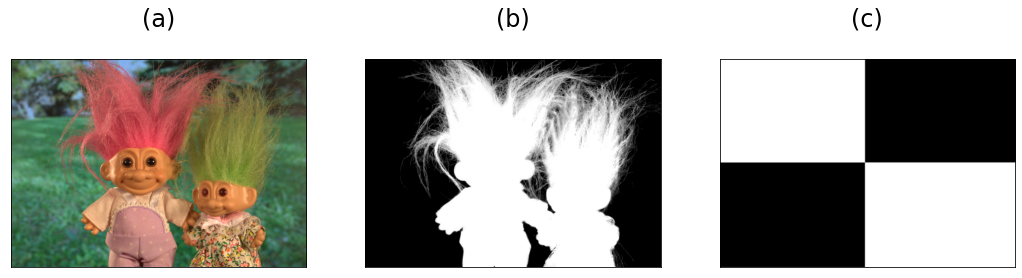

In [3]:
fig, axs = plt.subplots(1,3, figsize = (18,6))

axs[0].imshow(images['GT04'])
axs[1].imshow(images['GT04_alpha'])
axs[2].imshow(images['background'])

titles = ['(a)\n', '(b)\n', '(c)\n']

for ax, title in zip(axs,titles):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig("Results/Alpha_Composition.pdf", bbox_inches = 'tight')

## Image composition

In [4]:
image_alpha = alpha_composition(source = images['GT04'], 
                                destiny = images['background'], 
                                mask = images['GT04_alpha'])

## Plotting image

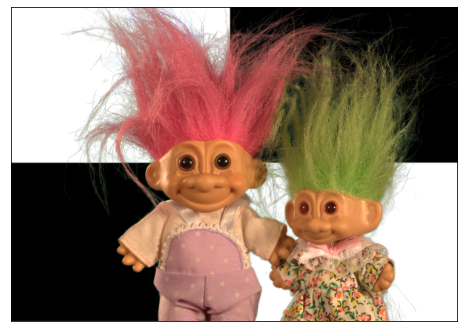

In [5]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(image_alpha)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Results/image_composition.pdf", bbox_inches = 'tight')

## Plotting others backgrounds

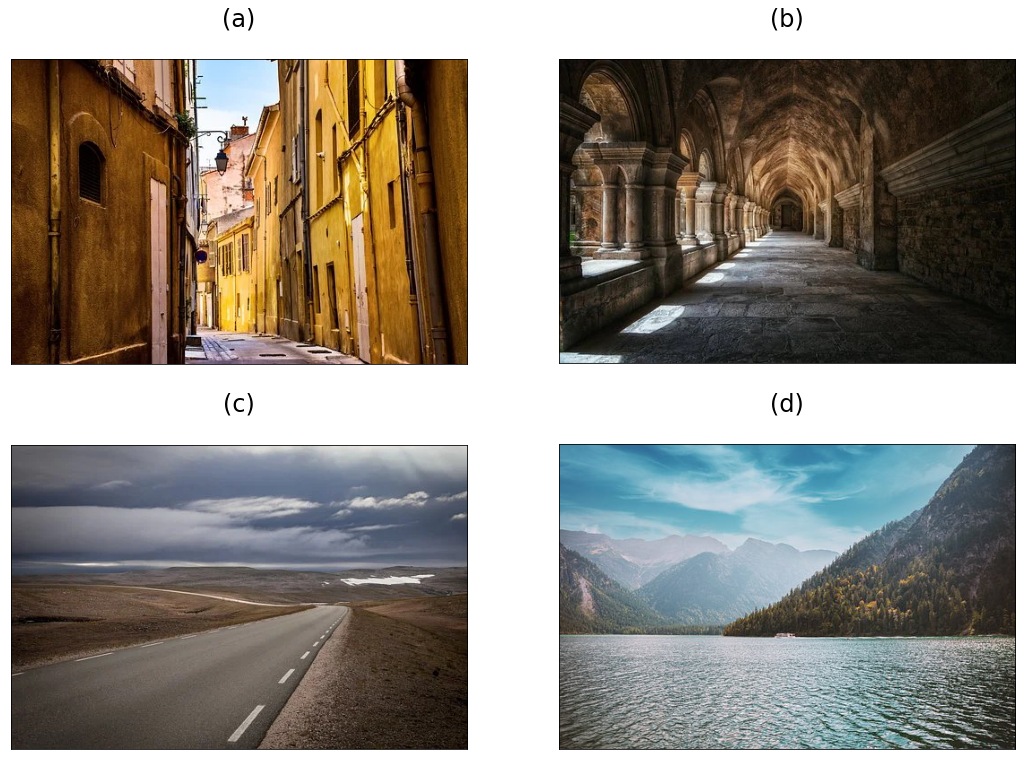

In [6]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images['rua'])
axs[0][1].imshow(images['mosteiro'])
axs[1][0].imshow(images['tundra'])
axs[1][1].imshow(images['lake'])

titles = [['(a)\n', '(b)\n'], ['(c)\n', '(d)\n']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig("Results/backgrounds.pdf", bbox_inches = 'tight')

## Composition with others backgrounds

In [7]:
new_images = dict()

for key in ['rua', 'mosteiro', 'tundra', 'lake']:
    
    new_images[key] = resize_and_composition(
        source = images['GT04'], 
        destiny = images[key], 
        mask = images['GT04_alpha'])

## Plotting others compositions

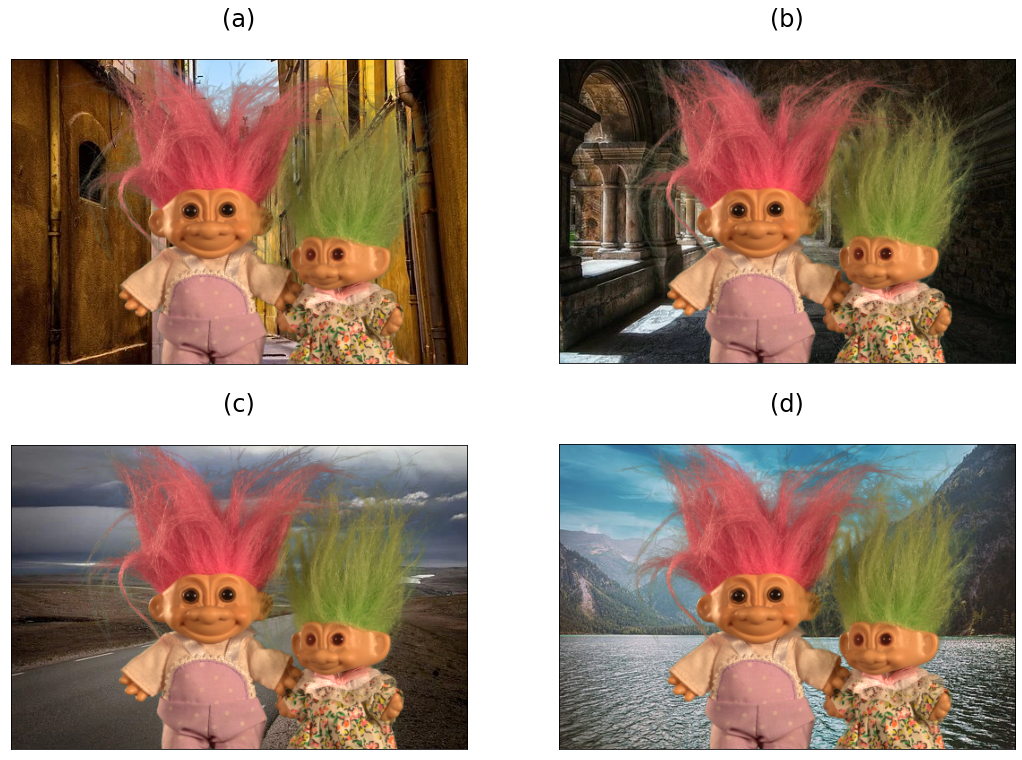

In [8]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(new_images['rua'])
axs[0][1].imshow(new_images['mosteiro'])
axs[1][0].imshow(new_images['tundra'])
axs[1][1].imshow(new_images['lake'])

titles = [['(a)\n', '(b)\n'], ['(c)\n', '(d)\n']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 24)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
plt.savefig("Results/backgrounds_new.pdf", bbox_inches = 'tight')

## Plotting selfie image

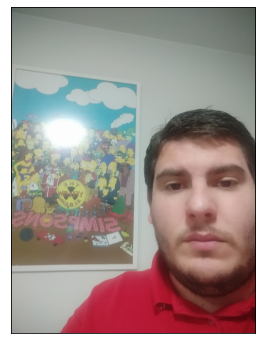

In [9]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images['selfie'])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

## Insert dolls in the selfie

In [10]:
selfie_part = resize_and_composition(
    source = images['GT04'], 
    destiny = images['selfie'][3424:4550, 500:2100,:],
    mask = images['GT04_alpha'], )

In [11]:
image_alpha = images['selfie'].copy()
image_alpha[3424:4550, 500:2100,:] = selfie_part

## Plotting selfie with the dolls

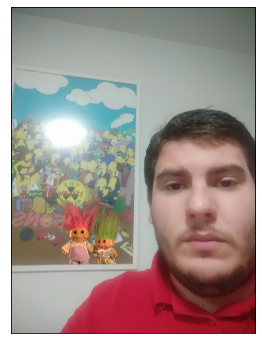

In [12]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(image_alpha)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Results/image_selfie_composition.pdf", bbox_inches = 'tight')